# Project Project: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access files in your Google Drive by specifying the path
file_path = '/content/drive/My Drive/Masters - Data Science/foodhub_order.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv(file_path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
print("The number of rows in provided set are: " +
      "\033[1m" + str(df.shape[0]) + "\033[0m" +
      "\nThe number of columns in provided dataset are: \033[1m" + str(df.shape[1]) + "\033[0m")

The number of rows in provided set are: 1898
The number of columns in provided dataset are: 9


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
print("\033[1mHere are the details of datatypes in provided dataset: \033[0m \n\n")
print(df.info())

Here are the details of datatypes in provided dataset:  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


### **Question 3:** Are there any missing values in the data?

In [ ]:
print("\033[1mHere is the sum of null values in each column: \033[0m \n\n")
print(df.isnull().sum())

Here is the sum of null values in each column:  


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

There are no missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
print("\033[1mHere is the statistical summary of provided data:\033[0m")
df.describe()

Here is the statistical summary of provided data:


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

The minimum, average, and maximum time it takes for food to be prepared is 20, 27.37, and 35 minutes respectively.

### **Question 5:** How many orders are not rated?

In [ ]:
print("Non-rated orders: \033[1m" + str(df['rating'].value_counts()['Not given']) + "\033[0m")

Non-rated orders: 736


## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

In [ ]:
print("\033[1m" + "Unique entries in each column are: " + "\033[0m" + "\n")
print(df.nunique())

Unique entries in each column are: 

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
columns=['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

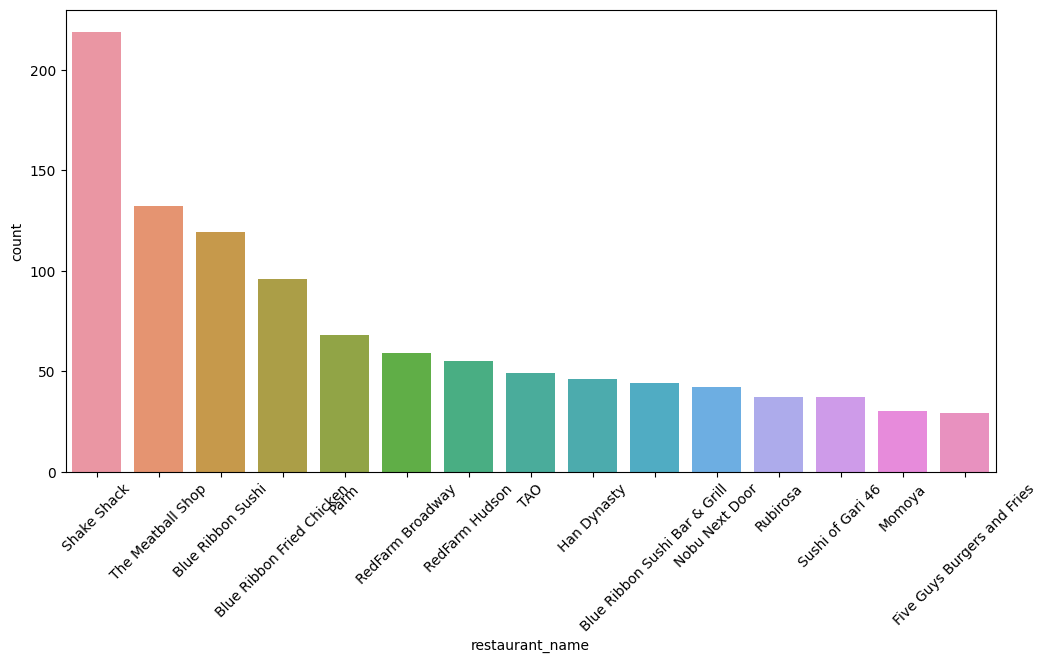

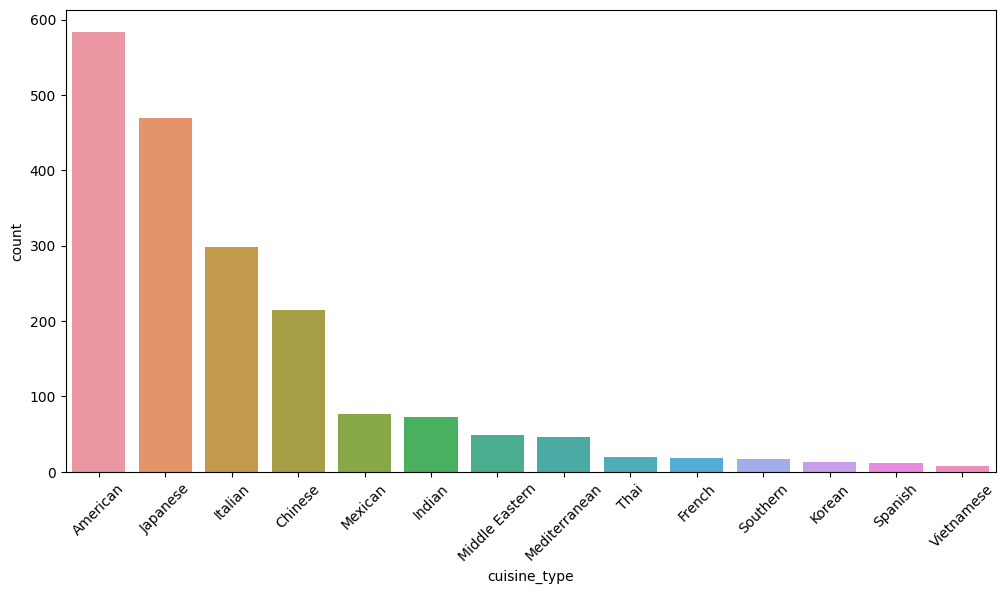

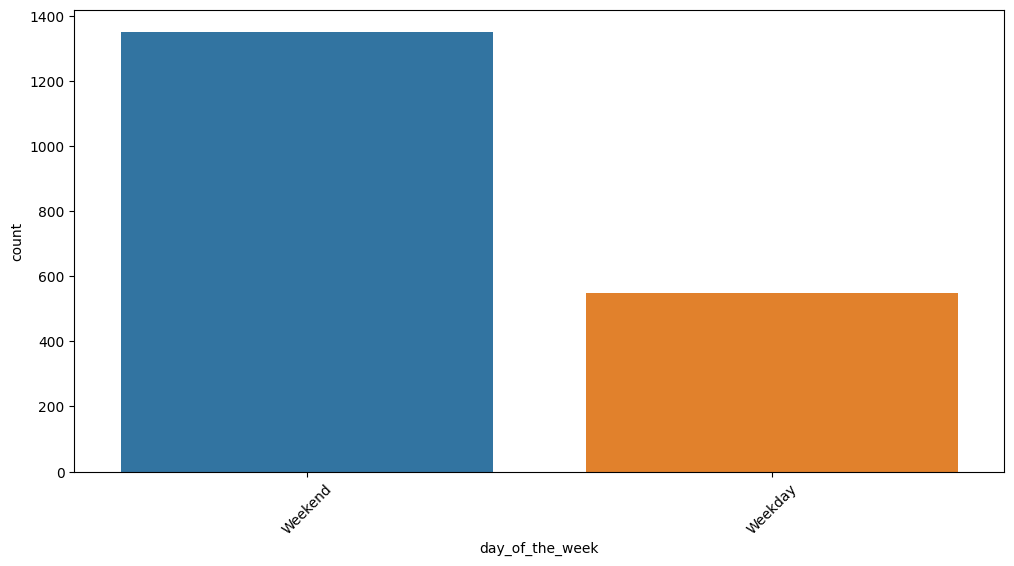

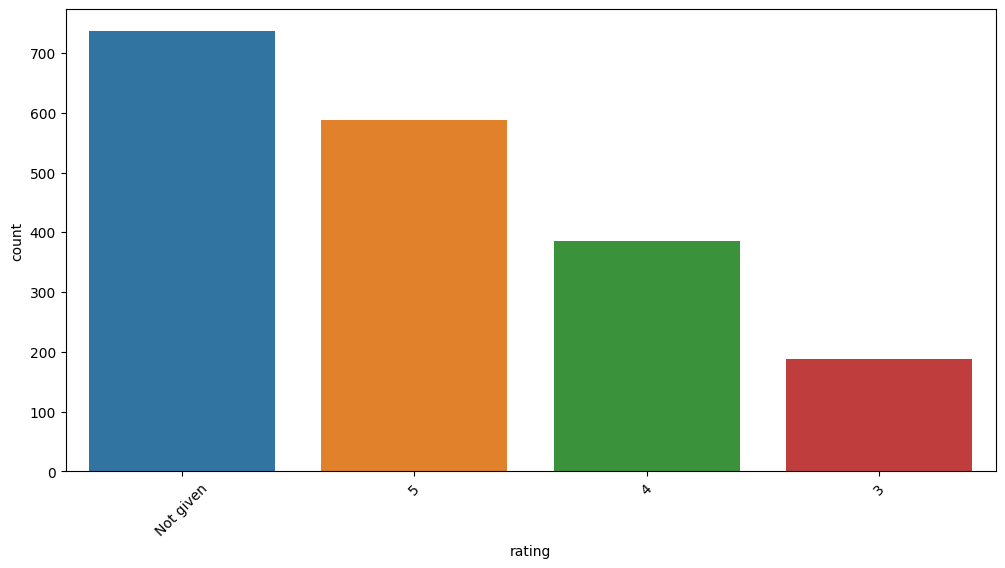

In [ ]:
for i in columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df,x=i, order=df[i].value_counts().head(15).index)
    plt.xticks(rotation = 45)
    plt.show();

In [ ]:
columns=['cost_of_the_order','food_preparation_time', 'delivery_time']

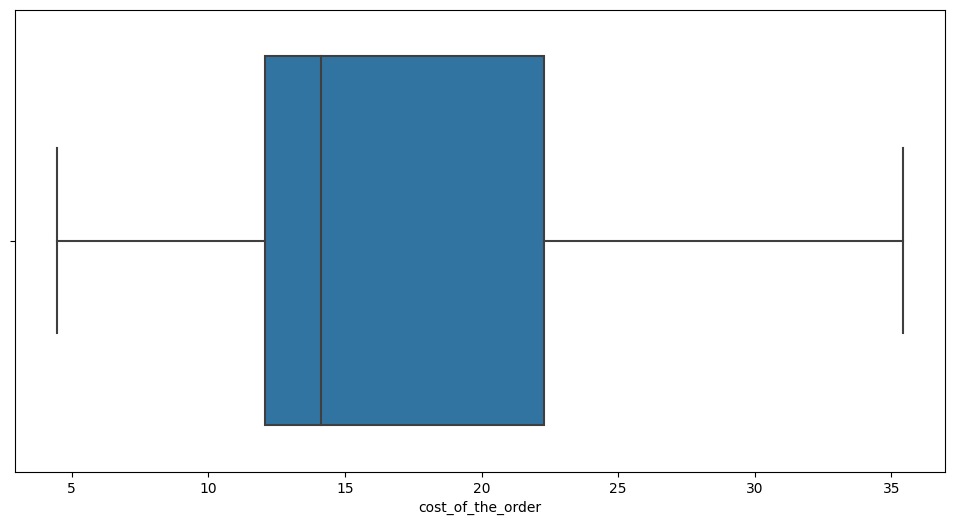

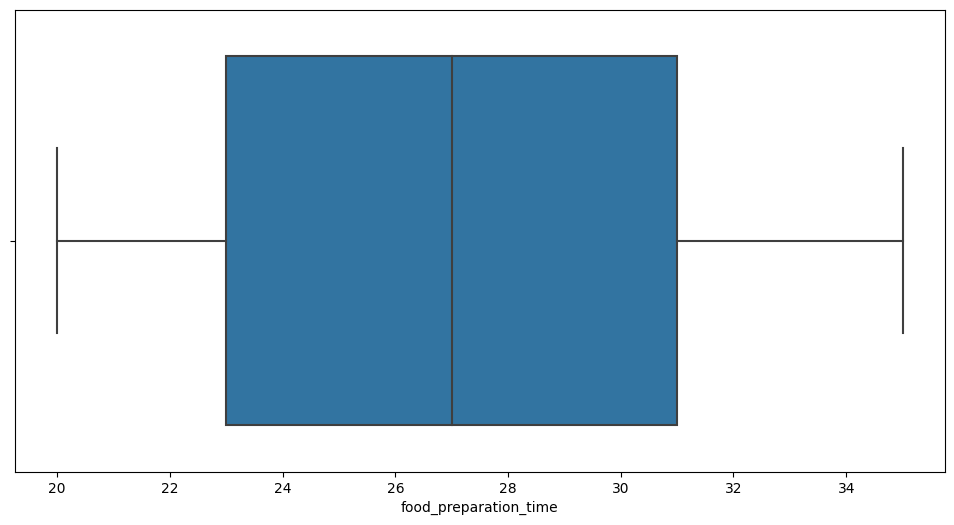

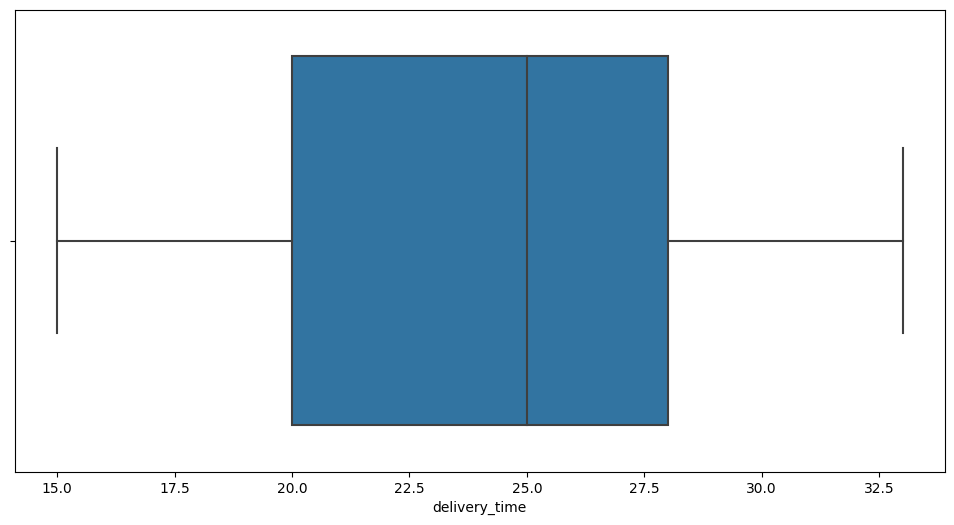

In [ ]:
# Plotting of statistical summary

for i in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df,x=i)
    plt.show();

#### Observations:

1. The most selling cuisine type is "American", and more than 80% of orders are divided in only 4 cuisine_types.
2. Shake Shack restaurant has most number of orders.
3. Orders on weekends are more than twice as compared to orders on weekdays.
4. The non-rated orders are the most in number.
4. The maximum orders cost between 10-15.
5. The maximum order delivery_time ranges between 25-28 minutes.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
print("\033[1m" + "Top 5 restaurants with their order counts are following: " + "\033[0m"
      + "\n\n" + df.restaurant_name.value_counts().head(5).to_string(header=False))


Top 5 restaurants with their order counts are following: 

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
weekend = df.groupby(['day_of_the_week'])

most_popular_cuisine = weekend.get_group('Weekend')['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekends is following: " + "\033[1m" + str(most_popular_cuisine) + "\033[0m")

The most popular cuisine on weekends is following: American


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
total_orders = df['cost_of_the_order'].count()
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order'] > 20].count()
percentage = round((orders_above20 / total_orders) * 100, 2)

output_string = (
    "Total orders: \033[1m{}\033[0m\n"
    "Orders with cost above $20: \033[1m{}\033[0m\n"
    "Percentage of orders above $20: \033[1m{}\033[0m%"
).format(total_orders, orders_above20, percentage)

print(output_string)


Total orders: 1898
Orders with cost above $20: 555
Percentage of orders above $20: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = round(df['delivery_time'].mean(), 2)

output_string = "Mean delivery time: \033[1m{} hours\033[0m".format(mean_delivery_time)

print(output_string)


Mean delivery time: 24.16 hours


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
top_customers = df['customer_id'].value_counts().head(3).to_string(header=False)

output_string = "Top 3 customer_ids by order count:\n\n\033[1m{}\033[0m".format(top_customers)

print(output_string)


Top 3 customer_ids by order count:

52832    13
47440    10
83287     9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


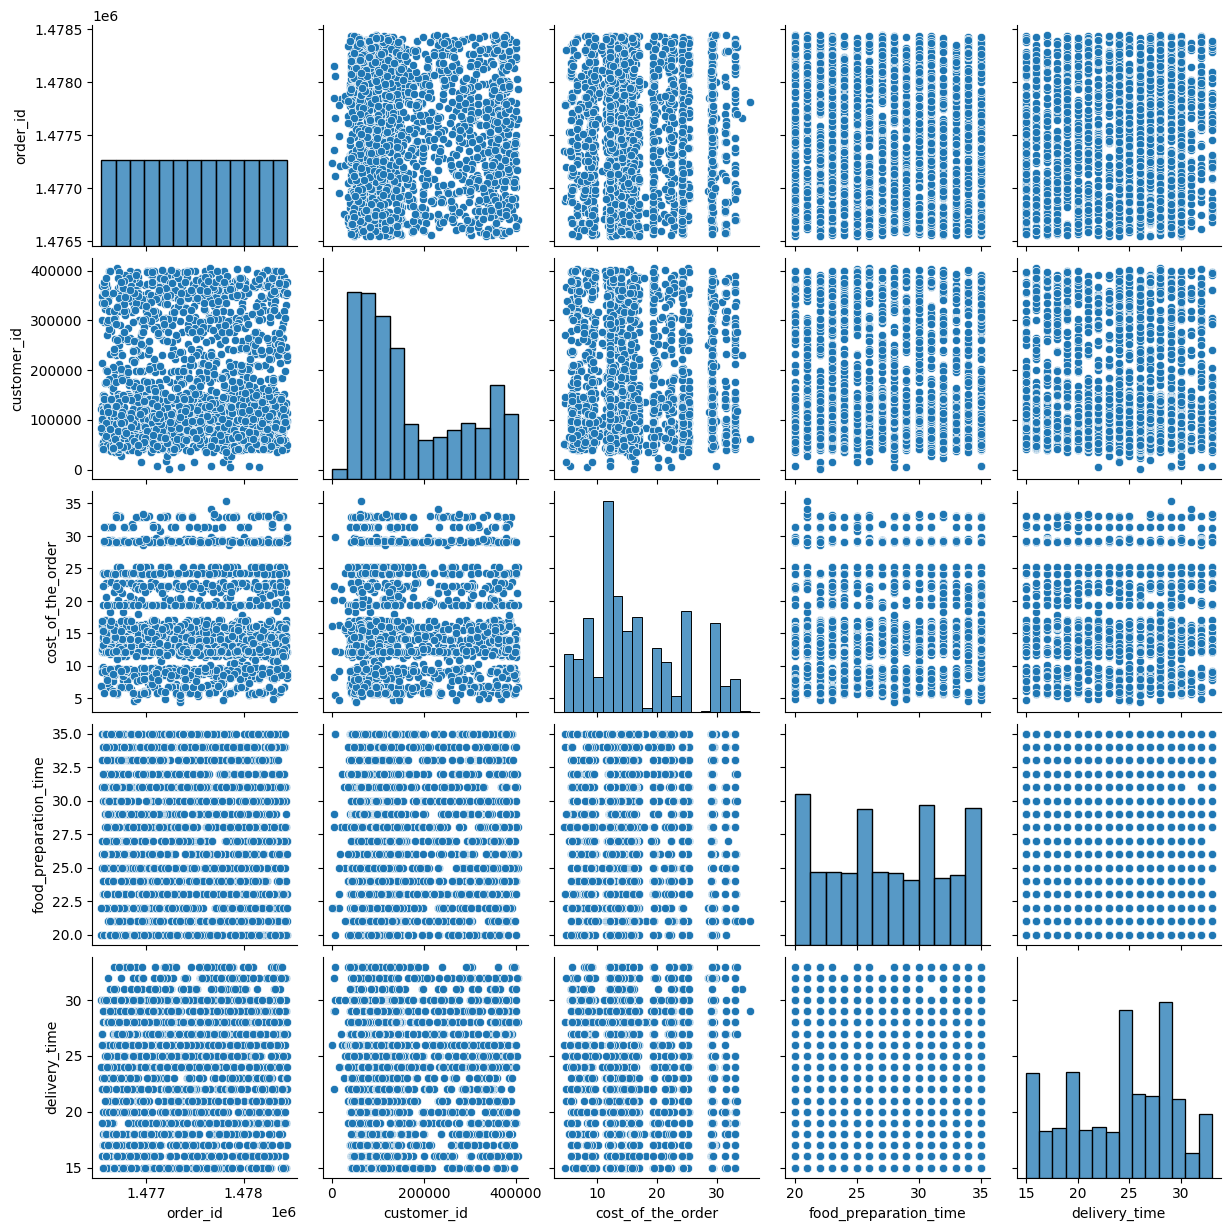

In [ ]:
# Pair plotting of whole dataset

sns.pairplot(df);

In [ ]:
# Removing non-numeric columns from the data

df_mod=df.drop("customer_id", axis=1)
df_mod=df_mod.drop("order_id", axis=1)
df_mod.head()

,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24


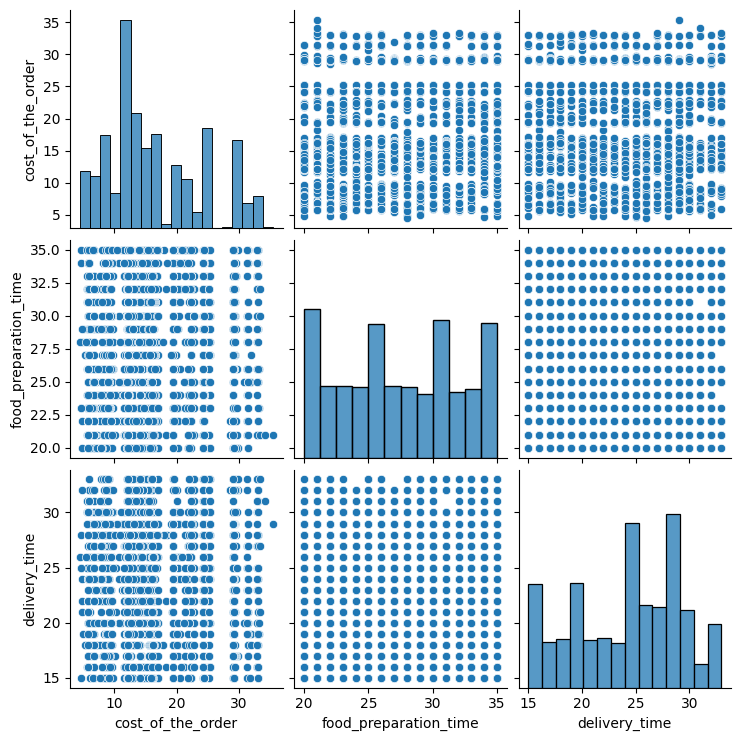

In [ ]:
# Pair plotting of numeric variables

sns.pairplot(df_mod);

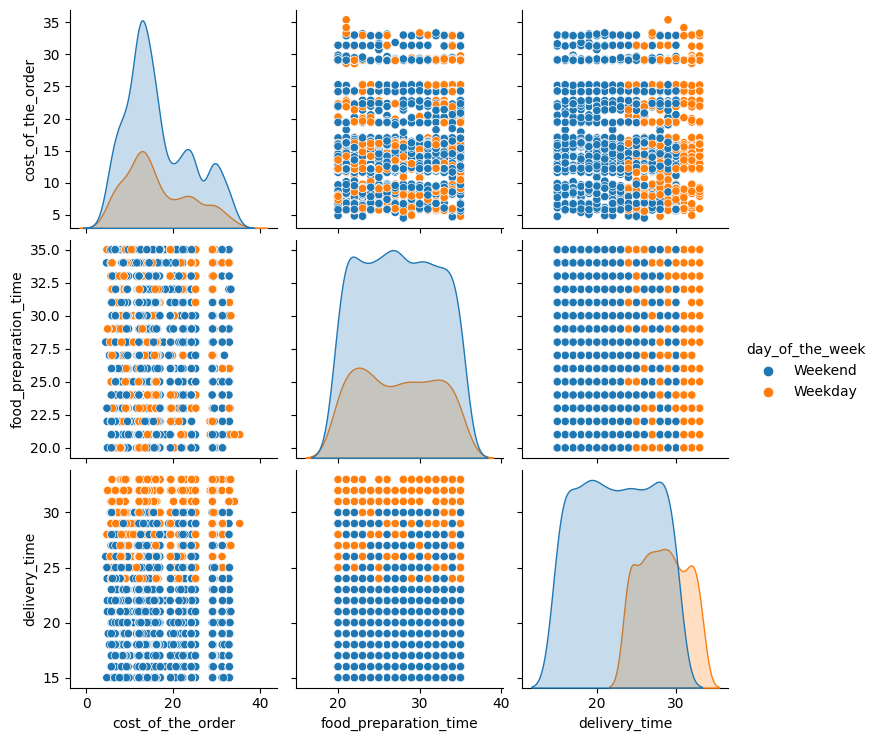

In [ ]:
# Pair plotting with the reference of day_of_the_week

sns.pairplot(df_mod, hue="day_of_the_week");

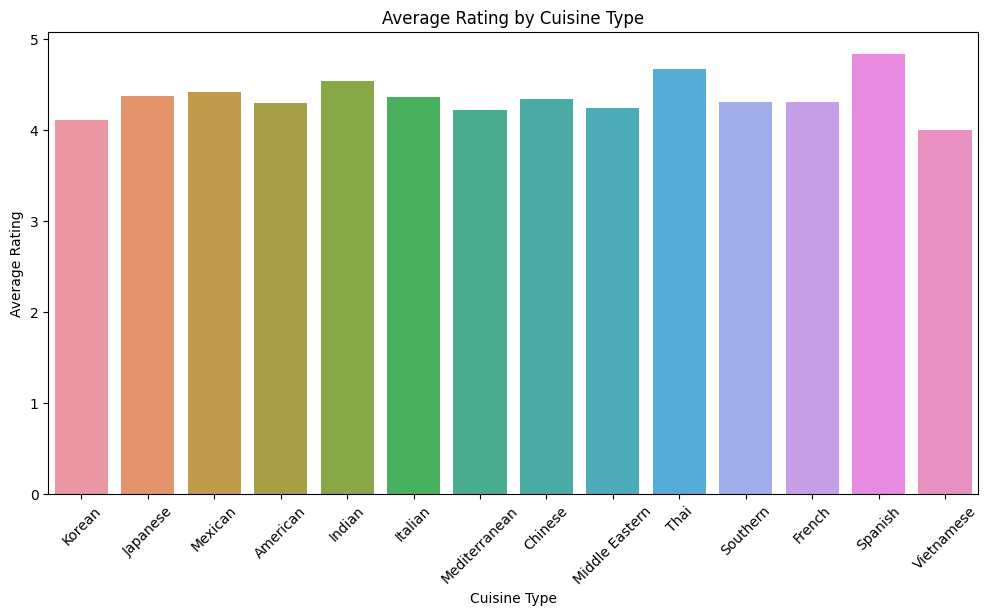

In [ ]:
# Cuisine_type vs. average rating

df_mod['rating'] = pd.to_numeric(df_mod['rating'], errors='coerce') # dealing with "Not Given" rating

plt.figure(figsize=(12, 6))
sns.barplot(data=df_mod, x='cuisine_type', y='rating', ci=None)
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine Type')
plt.show()

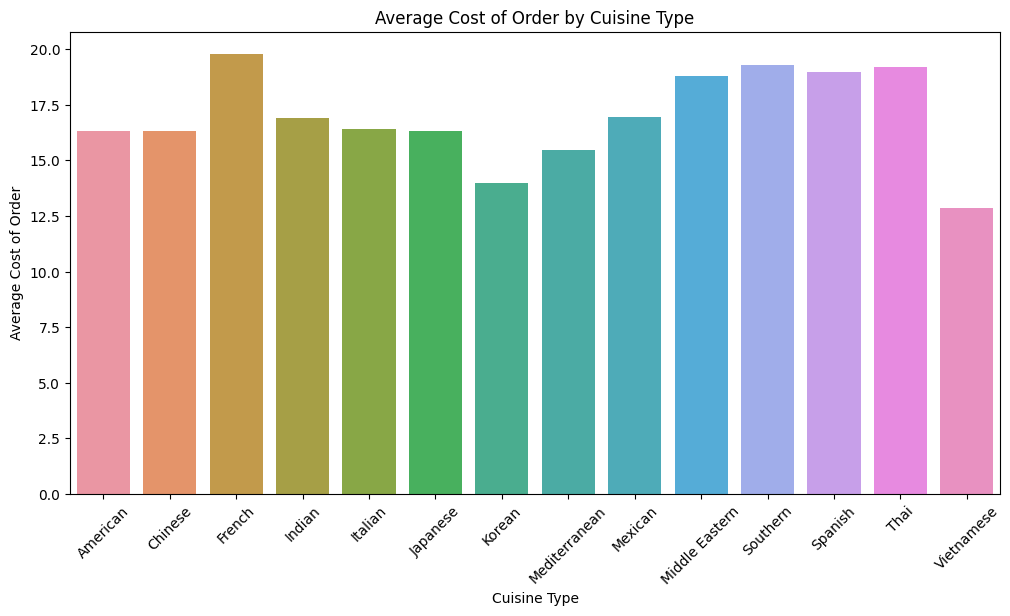

In [ ]:
# Average cost of the order for each cuisine type
avg_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().reset_index()

# Cuisine_type vs. average cost

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_cost_by_cuisine, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of Order')
plt.title('Average Cost of Order by Cuisine Type')
plt.show()

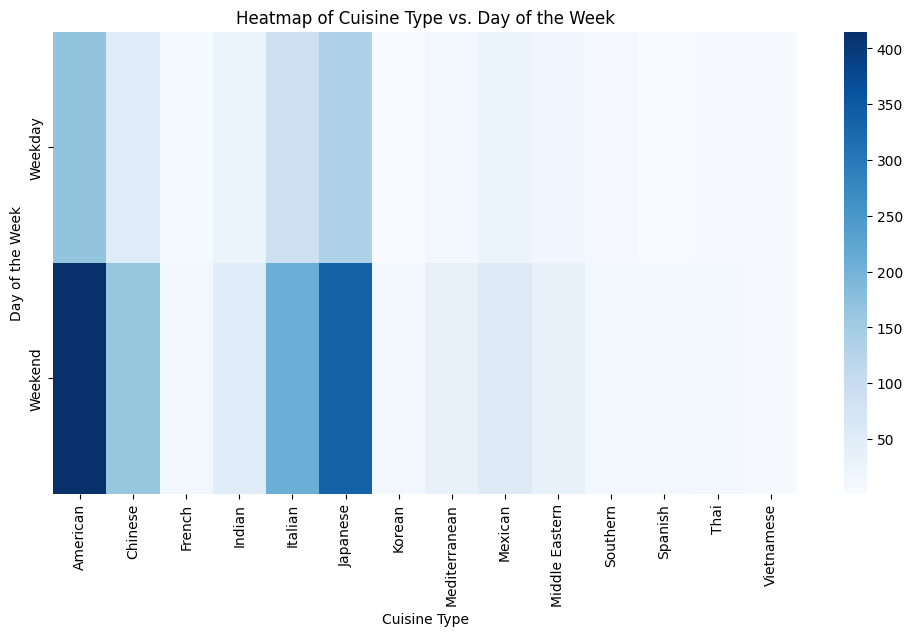

In [ ]:
# Create a pivot table with cuisine_type on the x-axis and day_of_the_week on the y-axis
pivot_table = df.pivot_table(index='day_of_the_week', columns='cuisine_type', aggfunc='size', fill_value=0)

# Cuisine Type vs. Day of the Week

plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, cmap='Blues')
plt.xlabel('Cuisine Type')
plt.ylabel('Day of the Week')
plt.title('Heatmap of Cuisine Type vs. Day of the Week')
plt.show()

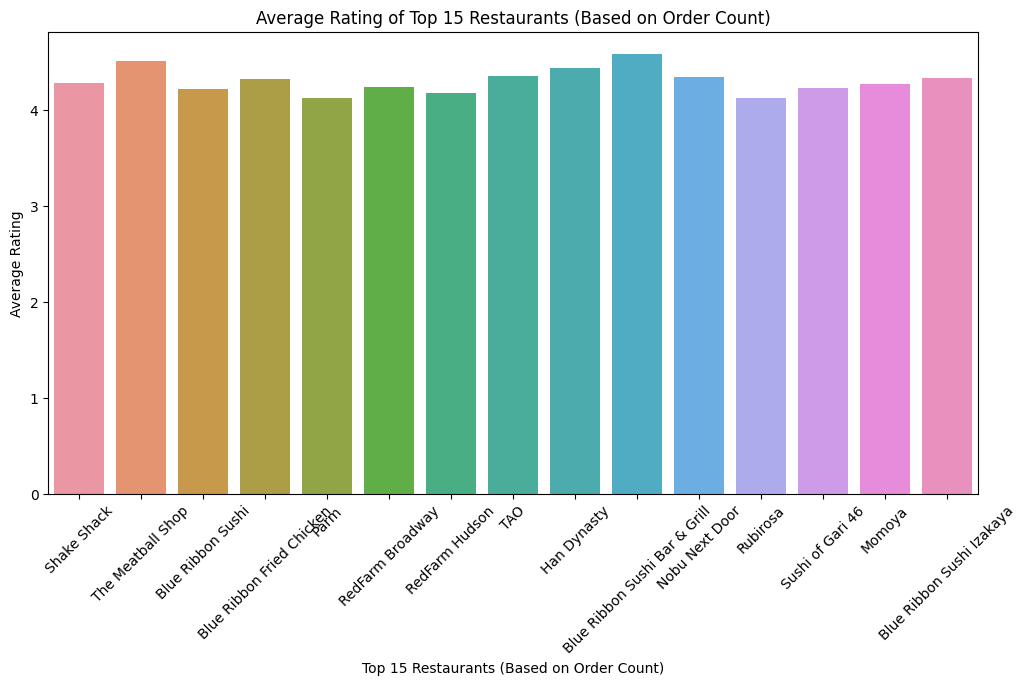

In [ ]:
# Average rating and count of orders for each restaurant

df['rating'] = pd.to_numeric(df['rating'], errors='coerce') # dealing with "Not Given" rating

restaurant_stats = df.groupby('restaurant_name')['rating', 'order_id'].agg({'rating': 'mean', 'order_id': 'count'}).reset_index()
restaurant_stats.columns = ['restaurant_name', 'average_rating', 'order_count']

# Top 15 restaurants by order count
top_15_restaurants = restaurant_stats.nlargest(15, 'order_count')

# Top 10 restaurants vs. average rating

plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_restaurants, x='restaurant_name', y='average_rating')
plt.xticks(rotation=45)
plt.xlabel('Top 15 Restaurants (Based on Order Count)')
plt.ylabel('Average Rating')
plt.title('Average Rating of Top 15 Restaurants (Based on Order Count)')
plt.show()

#### Observations:

1. On weekends, cost_of_order, ratings, food_preparation_time, and delivery time, all increases significantly.
2. Spanish and Thai cuisine_types have best overall average rating above 4.5 star.
3. French cuisine_type has the highest average_cost.
4. American and Japanese are the most selling cuisines on both weekdays and weekends.
4. Blue Ribbon Sushi Bar & Grill and The Meatball Shop are the two restaurants that are in top 15 on basis of order_count and have average ratings above 4.5 star.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Replace 'Not given' with NaN in the 'rating' column
df['rating'] = df['rating'].replace('Not given', np.nan)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant_name and calculate mean rating and count
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['mean', 'count'])

# Filter restaurants
promotional_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

print("\033[1mRestaurants fulfilling the promotional offer criteria:\033[0m\n")
print(promotional_restaurants)


Restaurants fulfilling the promotional offer criteria:

                               mean  count
restaurant_name                           
Blue Ribbon Fried Chicken  4.328125     64
Blue Ribbon Sushi          4.219178     73
Shake Shack                4.278195    133
The Meatball Shop          4.511905     84


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Revenue from orders with cost > 20 (charged at 25%)
revenue_above_20 = (df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25).sum()

# Revenue from orders with 20 > cost > 5 (charged at 15%)
revenue_above_5 = (df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15).sum()

net_revenue = revenue_above_20 + revenue_above_5

print("Net revenue generated by the company: \033[1m{}\033[0m".format(net_revenue))


Net revenue generated by the company: 6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Calculate the total time
total_time = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage
orders_above_60_minutes = total_time[total_time > 60].count()
total_orders = total_time.count()

percentage_above_60 = (orders_above_60_minutes / total_orders) * 100

print("Percentage of orders taking more than 60 minutes from order placement: \033[1m{:.2f}\033[0m%".format(percentage_above_60))


Percentage of orders taking more than 60 minutes from order placement: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# DataFrame grouping by 'day_of_the_week' and calculate the mean delivery time for each group
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print("\033[1mMean delivery time by day of the week:\n\033[0m")
print(mean_delivery_time_by_day.to_string(header=False))


Mean delivery time by day of the week:

Weekday    28.340037
Weekend    22.470022


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:

* A notable percentage of orders are not rated, which poses a challenge in understanding customer preferences and dislikes. Encouraging customers to provide feedback and ratings would help gain better insights into their preferences, allowing the company to tailor its offerings accordingly.

* The analysis reveals that delivery times are higher on weekdays. This could be attributed to increased traffic and other factors during weekdays. Addressing this issue could improve customer satisfaction and enhance the overall experience.

* Based on ratings and order counts, cuisines such as American, Japanese, and Italian are popular among customers. On the other hand, cuisines like Spanish, and French have lower popularity but good ratings.

* Surprisingly, the analysis shows that delivery time and cost have minimal impact on the performance of top restaurants. This implies that other factors such as cuisine variety, customer service, and ratings play a more significant role.

### Recommendations:

* To better understand customer preferences, the company should focus on actively encouraging customers to provide feedback and ratings. Implementing strategies such as post-order follow-ups and incentives for feedback submission could be effective.

* Cuisines with lower popularity and higher ratings require a more work in developing popularity. Potentially making adjustments to offerings or pricing could attract more customers.

* Capitalizing on the higher order count during weekends, the company can run special promotions, offers, and campaigns to engage customers and gather valuable feedback. This can help improve customer retention and loyalty.

* Addressing the longer delivery times during weekdays is crucial. Implementing strategies such as optimizing delivery routes, managing peak hours, and collaborating with delivery partners could lead to faster and more efficient deliveries.

In [151]:
!jupyter nbconvert --to html /content/drive/MyDrive/MastersDataScience/FoodHubApplicationAnalysis_PythonProject_PGP_DSBA.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/MastersDataScience/FoodHubApplicationAnalysis_PythonProject_PGP_DSBA.ipynb to html
[NbConvertApp] Writing 2729846 bytes to /content/drive/MyDrive/MastersDataScience/FoodHubApplicationAnalysis_PythonProject_PGP_DSBA.html
